In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud

In [2]:
dataset = pd.read_csv("PlanillaC.csv",sep=';')

In [3]:
dataset.head()

,nombre,apellido,genero,posicion,cedula,cargo,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
0,AARON JOSUE,MEDINA,M,43192.0,8-0919-00412,ESTADISTICO CENSAL I,41091.0,700.0,0.0,01/08/2023,2.0,EVENTUAL
1,ABDEL,BATISTA,M,4591.0,9-0712-01688,CONDUCTOR DE VEHICULO I,6034011.0,837.0,0.0,17/10/2011,1.0,PERMANENTE
2,ABDEL JABBAR,ARCIA,M,6053.0,8-0806-01206,AUDITOR FISCAL III,55023.0,1198.0,0.0,04/05/2022,1.0,PERMANENTE
3,ABDIEL,ESPINOSA,M,4785.0,9-0731-00875,ESTADISTICO II,41022.0,1548.0,0.0,16/04/2013,1.0,PERMANENTE
4,ABDIEL,OLIVARDIA,M,38112.0,8-0718-01099,TECNICO EN REPARACION DE EQUIPO DE COMUNICACI...,6012310.0,1300.0,0.0,03/01/2023,2.0,EVENTUAL


In [4]:
print(dataset.columns)

Index(['nombre', 'apellido', 'genero', 'posicion', 'cedula', 'cargo',
       'codigoCargo', 'salarioMensual', 'sobresueldo', 'inicioLaboral',
       'objetoGastos', 'estatus'],
      dtype='object')


In [5]:
print(dataset.dtypes)

nombre             object
apellido           object
genero             object
posicion          float64
cedula             object
cargo              object
codigoCargo       float64
salarioMensual    float64
sobresueldo       float64
inicioLaboral      object
objetoGastos      float64
estatus            object
dtype: object


In [6]:
dataset.values

array([['AARON JOSUE         ', 'MEDINA         ', 'M', ...,
        '01/08/2023', 2.0, 'EVENTUAL'],
       ['ABDEL               ', 'BATISTA        ', 'M', ...,
        '17/10/2011', 1.0, 'PERMANENTE'],
       ['ABDEL JABBAR        ', 'ARCIA          ', 'M', ...,
        '04/05/2022', 1.0, 'PERMANENTE'],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [7]:
dataset.axes

[RangeIndex(start=0, stop=4838, step=1),
 Index(['nombre', 'apellido', 'genero', 'posicion', 'cedula', 'cargo',
        'codigoCargo', 'salarioMensual', 'sobresueldo', 'inicioLaboral',
        'objetoGastos', 'estatus'],
       dtype='object')]

In [8]:
print(dataset.ndim)
print(dataset.size)
print(dataset.shape)

2
58056
(4838, 12)


In [9]:
dataset.at[4,'apellido']

'OLIVARDIA      '

In [10]:
dataset.loc[4]

nombre                                         ABDIEL              
apellido                                            OLIVARDIA      
genero                                                            M
posicion                                                    38112.0
cedula                                                 8-0718-01099
cargo             TECNICO EN REPARACION DE EQUIPO DE  COMUNICACI...
codigoCargo                                               6012310.0
salarioMensual                                               1300.0
sobresueldo                                                     0.0
inicioLaboral                                            03/01/2023
objetoGastos                                                    2.0
estatus                                                    EVENTUAL
Name: 4, dtype: object

In [11]:
dataset.loc[(dataset['salarioMensual']>1700)]

,nombre,apellido,genero,posicion,cedula,cargo,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
6,ABDIEL A,SOTO M,M,1258.0,8-0498-00271,ANALISTA DEL SISTEMA DE CONTABILIDAD GUBERNAME...,52012.0,1844.00,0.0,21/02/1995,1.0,PERMANENTE
10,ABDIEL E,ROMERO,M,497.0,8-0480-00091,JEFE DE AUDITORIA DE CONTRALORIA II (EXTERNA),54052.0,1815.00,0.0,02/02/2015,1.0,PERMANENTE
31,ABRAHAM,MUNIZ,M,3729.0,8-0713-02154,CONTADOR III (SUPERVISOR),51023.0,2102.00,0.0,24/03/2011,1.0,PERMANENTE
38,ADALBERTO B,RIVERA,M,3638.0,9-0197-00413,AUDITOR III (SUPERVISOR),54023.0,1896.00,0.0,01/11/2012,1.0,PERMANENTE
39,ADAN,VELASQUEZ,M,5004.0,8-0511-00138,AUDITOR III (SUPERVISOR),54023.0,2125.00,0.0,25/03/2002,1.0,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...
4748,ZULEICA,AGRAZAL C,F,1325.0,8-0240-00558,AUDITOR FISCAL SUPERVISOR,55050.0,1944.63,0.0,11/07/1983,1.0,PERMANENTE
4749,ZULEIKA,GUARDIA,F,2684.0,8-0397-00416,ANALISTA DE RECURSOS HUMANOS,36052.0,1773.00,0.0,22/05/2009,1.0,PERMANENTE
4754,ZULEIKA EDITH,PRADO,F,242.0,8-0297-00453,ASISTENTE EJECUTIVO II,17032.0,3564.00,0.0,16/01/2020,1.0,PERMANENTE
4760,ZULLY M,CASTILLO,F,3575.0,8-0516-01609,AUDITOR II,54022.0,1932.00,0.0,03/02/2016,1.0,PERMANENTE


In [12]:
dataset=dataset.dropna()

In [13]:
print(dataset.values)
print(dataset.shape)

[['AARON JOSUE         ' 'MEDINA         ' 'M' ... '01/08/2023' 2.0
  'EVENTUAL']
 ['ABDEL               ' 'BATISTA        ' 'M' ... '17/10/2011' 1.0
  'PERMANENTE']
 ['ABDEL JABBAR        ' 'ARCIA          ' 'M' ... '04/05/2022' 1.0
  'PERMANENTE']
 ...
 ['ZUNELDA E           ' 'MOORE          ' 'F' ... '16/02/2012' 1.0
  'PERMANENTE']
 ['ZURISADAI S         ' 'TREJOS         ' 'F' ... '16/09/2014' 1.0
  'PERMANENTE']
 ['ZURISADAY B         ' 'VILLARRETA     ' 'F' ... '01/09/2010' 1.0
  'PERMANENTE']]
(4765, 12)


([<matplotlib.axis.XTick at 0x228e5ed1550>,
 [Text(0, 0, 'Mujer'), Text(1, 0, 'hombre')])

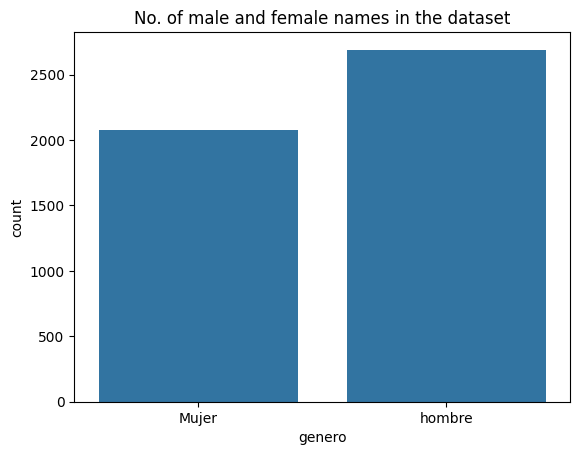

In [14]:
sns.countplot(x='genero',data=dataset)
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Mujer','hombre'))

Text(0.5, 1.0, 'No. of employees')

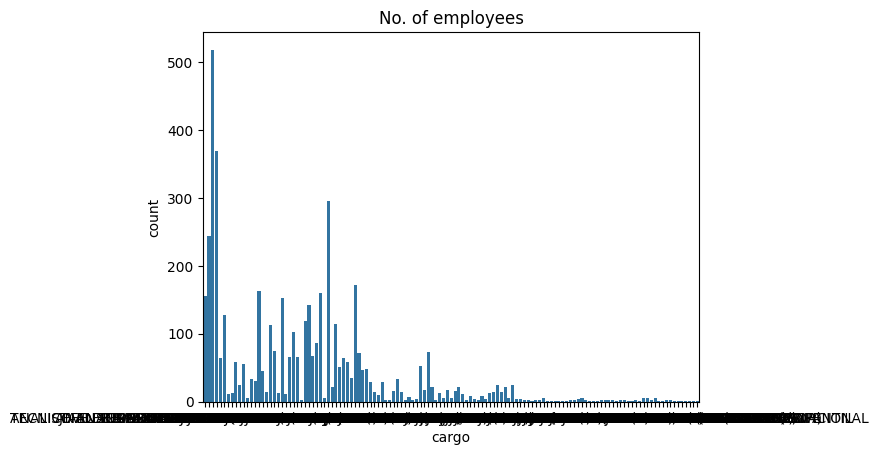

In [15]:
sns.countplot(x='cargo',data=dataset)
plt.title('No. of employees')

In [16]:
dataset.keys()

Index(['nombre', 'apellido', 'genero', 'posicion', 'cedula', 'cargo',
       'codigoCargo', 'salarioMensual', 'sobresueldo', 'inicioLaboral',
       'objetoGastos', 'estatus'],
      dtype='object')

In [17]:
dataset.tail()

,nombre,apellido,genero,posicion,cedula,cargo,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
4760,ZULLY M,CASTILLO,F,3575.0,8-0516-01609,AUDITOR II,54022.0,1932.0,0.0,03/02/2016,1.0,PERMANENTE
4761,ZULLYMA KARELYA,BONNINI,F,5713.0,8-0426-00924,ASISTENTE ADMINISTRATIVO II,17052.0,1160.0,0.0,09/09/2020,1.0,PERMANENTE
4762,ZUNELDA E,MOORE,F,4139.0,8-0751-02284,AUDITOR FISCAL III,55023.0,1359.0,0.0,16/02/2012,1.0,PERMANENTE
4763,ZURISADAI S,TREJOS,F,4106.0,8-0839-01479,ANALISTA DE SISTEMAS Y METODOS INFORMATICOS I,103011.0,1579.0,0.0,16/09/2014,1.0,PERMANENTE
4764,ZURISADAY B,VILLARRETA,F,1562.0,8-0795-00227,JEFE DE AUDITORIA DE CONTRALORIA I (EXTERNA),54051.0,1824.0,0.0,01/09/2010,1.0,PERMANENTE


In [18]:
dataset.groupby(['cargo']).count()

,nombre,apellido,genero,posicion,cedula,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
cargo,,,,,,,,,,,
ADMINISTRADOR I,1,1,1,1,1,1,1,1,1,1,1
ADMINISTRADOR II,2,2,2,2,2,2,2,2,2,2,2
ADMINISTRADOR III,3,3,3,3,3,3,3,3,3,3,3
ADMINISTRADOR REGIONAL,21,21,21,21,21,21,21,21,21,21,21
AGENTE DE SEGURIDAD II,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
SUPERVISOR DE MANTENIMIENTO,4,4,4,4,4,4,4,4,4,4,4
SUPERVISOR DE OPERACIONES,1,1,1,1,1,1,1,1,1,1,1
TECNICO EN REPARACION DE EQUIPO DE COMUNICACIONES,65,65,65,65,65,65,65,65,65,65,65


In [19]:
Countcargo = dataset.get(["cargo","genero","salarioMensual","estatus"],)

In [20]:
Countcargo = Countcargo.set_index('cargo')

In [21]:
Countcargo.head()

,genero,salarioMensual,estatus
cargo,,,
ESTADISTICO CENSAL I,M,700.0,EVENTUAL
CONDUCTOR DE VEHICULO I,M,837.0,PERMANENTE
AUDITOR FISCAL III,M,1198.0,PERMANENTE
ESTADISTICO II,M,1548.0,PERMANENTE
TECNICO EN REPARACION DE EQUIPO DE COMUNICACIONES,M,1300.0,EVENTUAL


In [22]:
Countcargo.tail()

,genero,salarioMensual,estatus
cargo,,,
AUDITOR II,F,1932.0,PERMANENTE
ASISTENTE ADMINISTRATIVO II,F,1160.0,PERMANENTE
AUDITOR FISCAL III,F,1359.0,PERMANENTE
ANALISTA DE SISTEMAS Y METODOS INFORMATICOS I,F,1579.0,PERMANENTE
JEFE DE AUDITORIA DE CONTRALORIA I (EXTERNA),F,1824.0,PERMANENTE


In [23]:
print(Countcargo.groupby(['cargo']).sum())

                                                    salarioMensual
cargo                                                             
ADMINISTRADOR I                                             2500.0
ADMINISTRADOR II                                            4956.0
ADMINISTRADOR III                                           8162.0
ADMINISTRADOR REGIONAL                                     45723.6
AGENTE DE SEGURIDAD II                                      5909.0
...                                                            ...
SUPERVISOR DE MANTENIMIENTO                                 5152.4
SUPERVISOR DE OPERACIONES                                   1909.0
TECNICO EN REPARACION DE EQUIPO DE  COMUNICACIONES         90207.3
TRABAJADOR MANUAL  I                                      103648.0
TRABAJADOR SOCIAL GENERAL I                                10233.0

[129 rows x 1 columns]


C:\Users\danie\AppData\Local\Temp\ipykernel_26056\2211520094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(Countcargo.groupby(['cargo']).sum())


In [24]:
Countcargo.loc[['ADMINISTRADOR I','ADMINISTRADOR II']]

,genero,salarioMensual,estatus
cargo,,,
ADMINISTRADOR I,F,2500.0,PERMANENTE
ADMINISTRADOR II,M,2450.0,PERMANENTE
ADMINISTRADOR II,M,2506.0,PERMANENTE


In [25]:
from ipywidgets import interact

In [27]:
@interact
def filter_cargo(cargo = list(dataset.cargo.unique())):
    return dataset[dataset.cargo == cargo].head()

interactive(children=(Dropdown(description='cargo', options=('ESTADISTICO CENSAL I', 'CONDUCTOR DE VEHICULO   …

In [34]:
pd.options.plotting.backend = 'plotly'

In [38]:
@interact

def plot_cargo(cargo = list(dataset.cargo.unique())):
    filter_dataset = dataset[dataset.cargo == cargo]

    fig = filter_dataset.plot(kind = 'scatter',
                              x = 'cargo',
                              y = 'salarioMensual',
                              color = 'estatus',
                              size = 'posicion')
    fig.show()

interactive(children=(Dropdown(description='cargo', options=('ESTADISTICO CENSAL I', 'CONDUCTOR DE VEHICULO   …

In [40]:
dataset.cargo.unique().size

129